In [1]:
import sys, os, glob, uuid, pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ROOT as rt
import uproot as ur

Welcome to JupyROOT 6.22/02


In [2]:
path_prefix = os.getcwd() + '/../'
if(path_prefix not in sys.path): sys.path.append(path_prefix)
from util import qol_util as qu

In [3]:
plotstyle = qu.PlotStyle('dark')
plotstyle.SetStyle() # set ROOT colors

# set label text colors for mpl
mpl.rc('axes',edgecolor=plotstyle.text_plt,labelcolor = plotstyle.text_plt, facecolor = plotstyle.text_plt)
mpl.rc('xtick',color=plotstyle.text_plt)
mpl.rc('ytick',color=plotstyle.text_plt)

In [4]:
modelpath = path_prefix + 'classifier/Models/resnet/'
history_files = glob.glob(modelpath + '*.history')

histories = {}

for file in history_files:
    with open(file,'rb') as model_history_file:
        histories[file] = pickle.load(model_history_file)

In [7]:
nepochs = 10
N = len(histories)
keys = ['acc','loss','val_acc','val_loss']

avg = {key:np.mean(np.row_stack([x[key] for x in histories.values()]),axis=0) for key in keys}
err = {key:np.std(np.row_stack([x[key] for x in histories.values()]),axis=0,ddof=1)/np.sqrt(N) for key in keys}
epochs = np.arange(nepochs) + 1

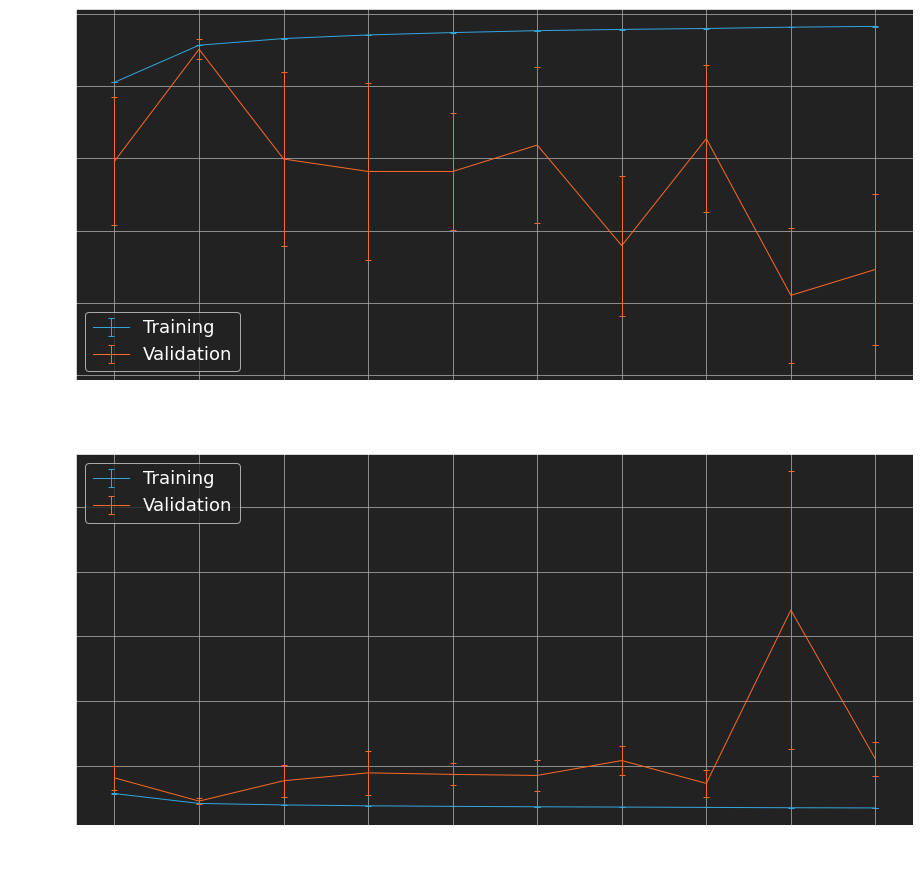

In [58]:
# make some mpl plots

capsize = 3
fontsize = 18

fig, axs = plt.subplots(2,1,figsize=(15,15))
axs[0].errorbar(epochs, avg['acc'], yerr=err['acc'],capsize=capsize,linewidth=1.,color=plotstyle.curve_plt,label='Training')
axs[0].errorbar(epochs, avg['val_acc'], yerr=err['val_acc'],capsize=capsize,linewidth=1.,color='#F96928',label='Validation')

axs[1].errorbar(epochs, avg['loss'], yerr=err['loss'],capsize=capsize,linewidth=1.,color=plotstyle.curve_plt,label='Training')
axs[1].errorbar(epochs, avg['val_loss'], yerr=err['val_loss'],capsize=capsize,linewidth=1.,color='#F96928',label='Validation')

ylabels = ['Accuracy','Loss']
legend_position = ['lower left','upper left']
legends = []
for i,ax in enumerate(axs.flatten()): 
    ax.set_facecolor(plotstyle.canv_plt)
    ax.grid(color=plotstyle.grid_plt)
    ax.set_xlabel('Epoch',fontsize=fontsize)
    ax.set_ylabel(ylabels[i],fontsize=fontsize)
    ax.set_xticks(np.arange(min(epochs), max(epochs)+1, 1.0))
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    legends.append(ax.legend(loc = legend_position[i],facecolor=plotstyle.canv_plt, fontsize=fontsize))
    
for legend in legends:
    for text in legend.get_texts():
        text.set_color(plotstyle.text_plt)
        
fig.savefig(os.getcwd() + '/resnet.png',transparent=True,dpi=150)